In [47]:
import cloudytab
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import astropy.units as u

In [48]:
datapath = Path.cwd().parent / "cloudy"

In [49]:
m = cloudytab.CloudyModel(datapath / "ou5-T107-L500-n150-Zfluct-short")
m0 = cloudytab.CloudyModel(datapath / "ou5-T107-L500-n150")

In [50]:
m

In [51]:
m.data["ovr"]

depth,Te,Htot,hden,eden,2H_2/H,HI,HII,HeI,HeII,HeIII,CO/C,C1,C2,C3,C4,O1,O2,O3,O4,O5,O6,H2O/O,AV(point),AV(extend),Tau912
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
226894000000000.0,14164.0,2.031e-19,150.0,178.22,1.207e-14,0.00055125,0.99945,3.7552e-05,0.13344,0.86652,4.8268e-24,2.9884e-07,0.0011769,0.21423,0.60763,1.529e-07,0.00057718,0.26067,0.71543,0.02332,1.8302e-06,1.1186e-30,3.67e-05,2.74e-05,0.0003415
1361360000000000.0,13922.0,2.048e-19,150.0,178.33,1.2905e-14,0.00056457,0.99944,3.9288e-05,0.13629,0.86367,5.8676e-24,3.1099e-07,0.0012196,0.21779,0.60874,1.6312e-07,0.00060253,0.26594,0.71081,0.022644,1.7477e-06,1.2891e-30,0.000184,0.000137,0.0017304
3518940000000000.0,13137.0,2.107e-19,150.0,178.3,1.542e-14,0.00059913,0.9994,4.3834e-05,0.14316,0.8568,9.6402e-24,3.397e-07,0.0013333,0.22731,0.61031,1.8815e-07,0.00066527,0.27799,0.70021,0.021138,1.5799e-06,1.7977e-30,0.000386,0.000288,0.0037252
5396530000000000.0,12553.0,2.15e-19,150.0,178.27,1.7675e-14,0.00062691,0.99937,4.7684e-05,0.14841,0.85154,1.4075e-23,3.6993e-07,0.0014412,0.23634,0.61007,2.1053e-07,0.00071812,0.28762,0.69167,0.019984,1.4536e-06,2.307e-30,0.000488,0.000363,0.0047597
6428960000000000.0,12136.0,2.187e-19,150.0,178.24,1.9459e-14,0.00064703,0.99935,5.054e-05,0.15228,0.84767,1.8161e-23,3.9267e-07,0.0015205,0.24288,0.60922,2.2648e-07,0.00075476,0.29381,0.68617,0.019273,1.3797e-06,2.7216e-30,0.000553,0.000412,0.0054425
7187560000000000.0,11748.0,2.227e-19,150.0,178.22,2.1309e-14,0.00066618,0.99933,5.3298e-05,0.15597,0.84397,2.282e-23,4.1511e-07,0.0015972,0.24915,0.60791,2.4152e-07,0.00078857,0.29909,0.68144,0.018679,1.3204e-06,3.151e-30,0.00061,0.000455,0.0060519
7862040000000000.0,11371.0,2.267e-19,150.0,178.2,2.3329e-14,0.00068554,0.99931,5.6133e-05,0.15966,0.84028,2.8394e-23,4.3934e-07,0.0016776,0.25565,0.60615,2.5698e-07,0.00082244,0.30408,0.67697,0.018128,1.2666e-06,3.6218e-30,0.000662,0.000494,0.0066162
8473500000000000.0,11010.0,2.308e-19,150.0,178.18,2.5516e-14,0.00070496,0.9993,5.9031e-05,0.16332,0.83662,3.496e-23,4.6524e-07,0.0017613,0.26235,0.60398,2.728e-07,0.00085615,0.30878,0.67274,0.017617,1.2174e-06,4.1312e-30,0.000709,0.000529,0.0071384
9030110000000000.0,10663.0,2.35e-19,150.0,178.15,2.7888e-14,0.00072446,0.99928,6.1997e-05,0.16697,0.83297,4.2626e-23,4.9275e-07,0.0018483,0.26922,0.60145,2.8896e-07,0.00088974,0.31323,0.66874,0.01714,1.1722e-06,4.6786e-30,0.000752,0.000561,0.0076258


(0.0, 14810.79)

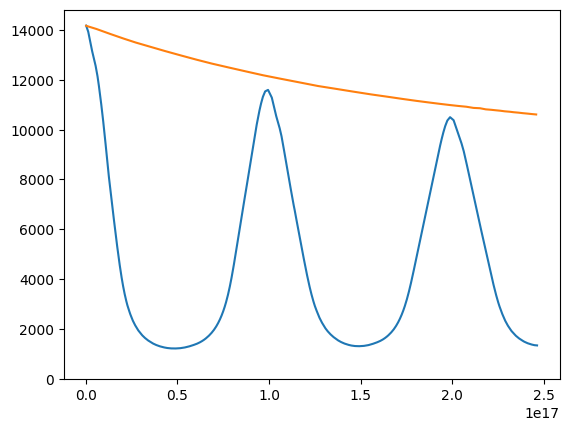

In [52]:
fig, ax = plt.subplots()
ax.plot("depth", "Te", data=m.data["ovr"])
ax.plot("depth", "Te", data=m0.data["ovr"])
ax.set_ylim(0, None)

In [53]:
edata = m.data["ems"]
edata0 = m0.data["ems"]

In [54]:
elines = list(edata.columns[1:])
elines

['H  1 6562.80A',
 'H  1 4861.32A',
 'He 2 4685.68A',
 'He 2 6560.01A',
 'He 1 5015.68A',
 'O  3 5006.84A',
 'N  2 6583.45A',
 'C  2 4267.00A']

In [55]:
r_inner = (0.06 * u.pc).cgs.value

In [56]:
radius = m.data["ovr"]["depth"] + r_inner
radius0 = m0.data["ovr"]["depth"] + r_inner


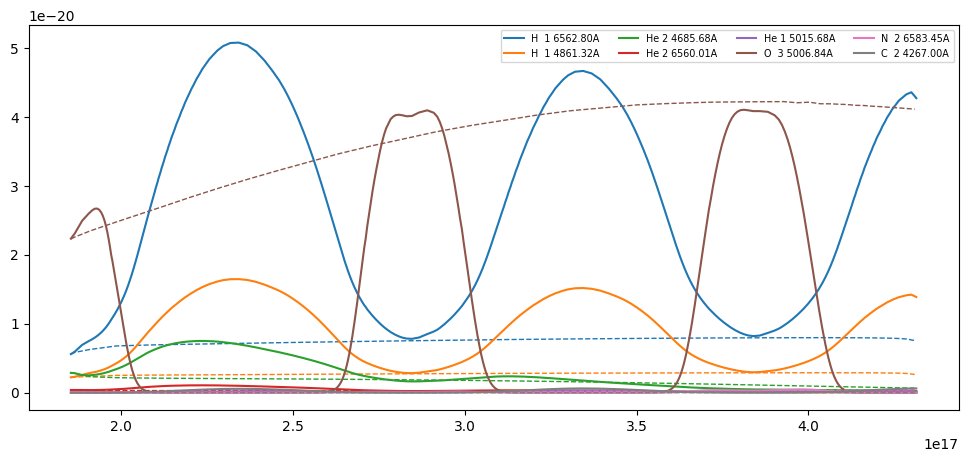

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))
for eline in elines:
    line, = ax.plot(radius, edata[eline], label=eline)
    ax.plot(radius0, edata0[eline], label=None, color=line.get_color(), lw=1, ls="dashed")
ax.set_yscale("linear")
ax.legend(ncol=4, fontsize="x-small")